### **Aerofit Treadmill Customer Profiling & Recommendation Report**
**M N Wasif, DSML Apr 2025 batch (TTS)**

In [97]:
# Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [98]:
# Load dataset from csv as Pandas DataFrame
df = pd.read_csv('/content/aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [99]:
df.shape

(180, 9)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [101]:
df.duplicated().sum()

np.int64(0)

In [102]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


---

## **1. Problem Statement & Basic Metrics**

**Problem**: Aerofit aims to understand the distinct customer profiles for its three treadmill models (KP281, KP481, KP781) to improve targeted marketing and sales recommendations.

##  **1. Basic Dataset Analysis**

### a) Shape of Dataset
- **Rows**: 180  
- **Columns**: 9

### b) Data Types
| Column          | Data Type |
|-----------------|-----------|
| Product         | object (categorical) |
| Age             | int64 |
| Gender          | object |
| Education       | int64 |
| MaritalStatus   | object |
| Usage           | int64 |
| Fitness         | int64 |
| Income          | int64 |
| Miles           | int64 |

 **All columns are complete** – **no missing values** (`df.isnull().sum()` = 0 for all).

---


In [103]:
# Numeric datatype EDA
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [104]:
# Object datatype EDA
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [105]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [106]:
df["Product"].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [107]:
df["Age"].value_counts()

,count
Age,
25,25
23,18
24,12
26,12
28,9
33,8
35,8
22,7
30,7


In [108]:
df["Education"].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [109]:
df["Usage"].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [110]:
df["Fitness"].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


---

#### **Non-Graphical Analysis: Value Counts**

- **Product**: KP281 (80), KP481 (60), KP781 (40)
- **Gender**: Male (104), Female (76)
- **MaritalStatus**: Partnered (107), Single (73)
- **Education**: Spans from 12 to 21 years, with a concentration around 14-16 years (Bachelor's level).
- **Usage**: Most plan to use the treadmill 3-4 times a week.

---


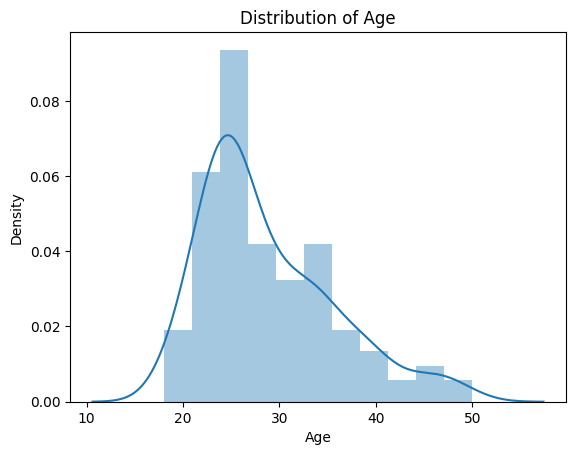

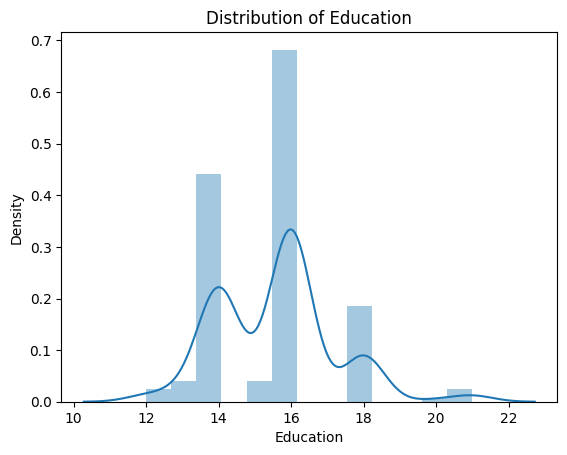

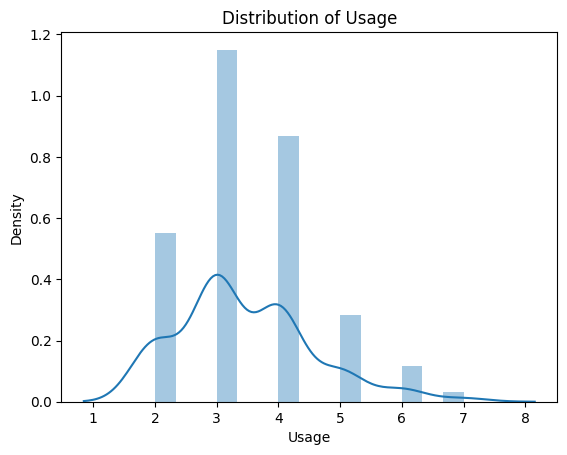

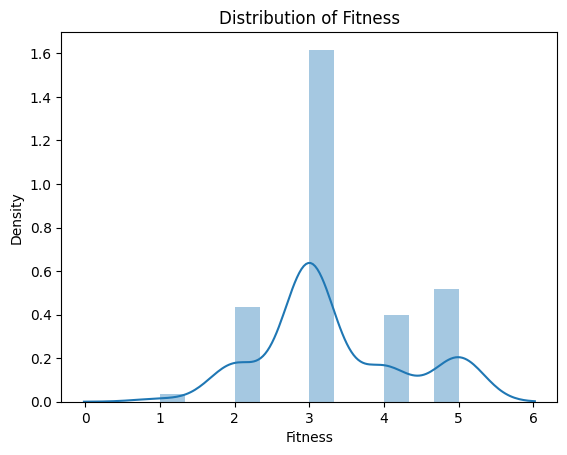

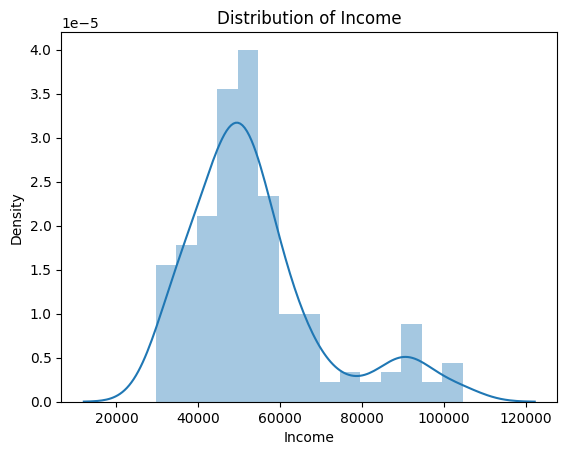

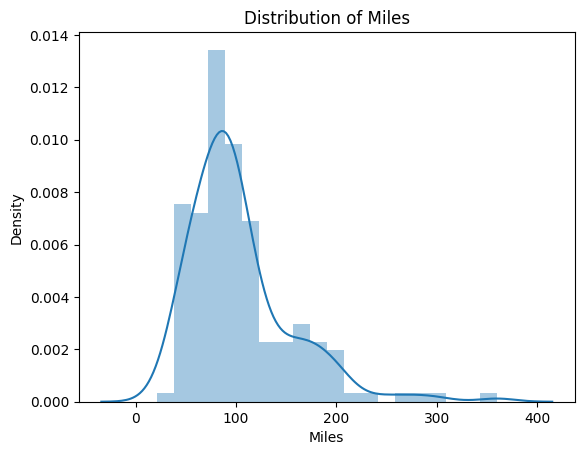

In [111]:
# Histogram plot for mean meadian mode distribution
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
  sns.distplot(df[col])
  plt.title(f'Distribution of {col}')
  plt.show()

---
**Data Structure**:
- **Rows**: 180 customers
- **Columns**: 9 features (1 ID, 3 categorical, 5 numerical)
- **Data Types**: `Product`, `Gender`, `MaritalStatus` are categorical. `Age`, `Education`, `Usage`, `Fitness`, `Income`, `Miles` are numerical.

**Statistical Summary**:
- **Age**: Ranges from 18 to 50 (Mean: ~29). The customer base is young to middle-aged.
- **Income**: Ranges from ~$29K to ~$105K (Mean: ~$54K), indicating a broad economic base.
- **Product Mix**: KP281 is the most popular (44.4%), followed by KP481 (33.3%) and KP781 (22.2%).
- **Fitness**: Most customers rate themselves as average (3) to good (4) on fitness.

---

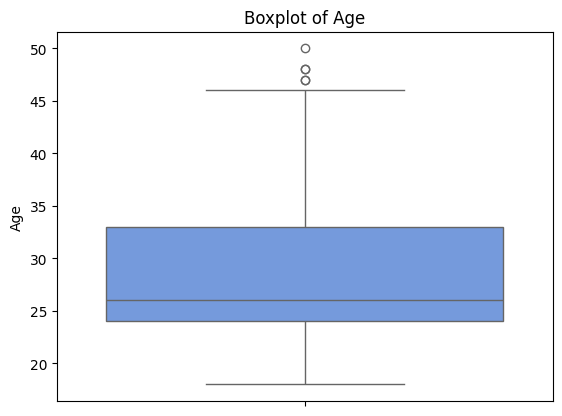

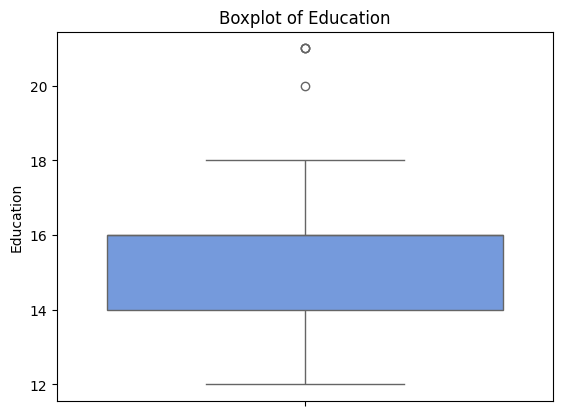

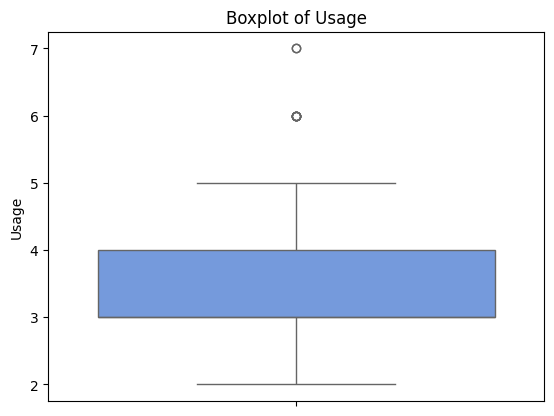

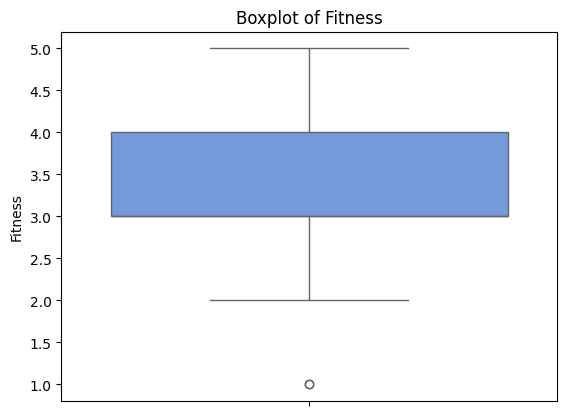

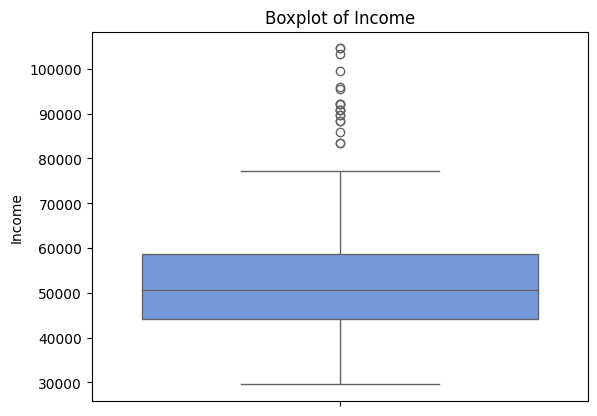

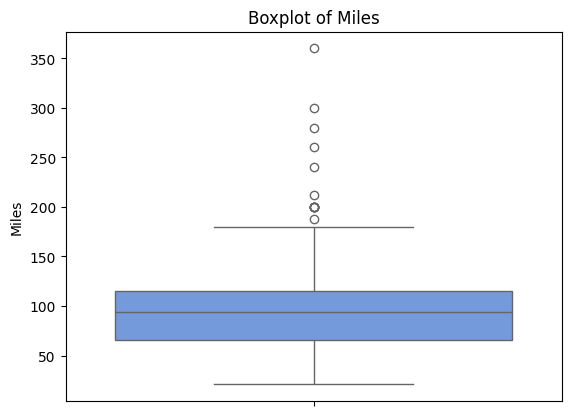

In [112]:
# Boxplot of numeric dtypes
for col in numeric_cols:
  sns.boxplot(y=df[col], color = 'cornflowerblue')
  plt.title(f'Boxplot of {col}')
  plt.show()



---

#### **Visual Analysis**

We will now generate the key visualizations to understand the data.

**a) Univariate Analysis (Numerical)**: Histograms for `Age`, `Income`, `Miles` show the distribution of customers.
**b) Univariate Analysis (Categorical)**: Count plots for `Product`, `Gender`, `MaritalStatus`.
**c) Bivariate Analysis**: Box plots of `Income`, `Age`, `Miles` vs. `Product` to see differences between user groups.
**d) Correlation**: A heatmap to identify relationships between numerical variables.

---


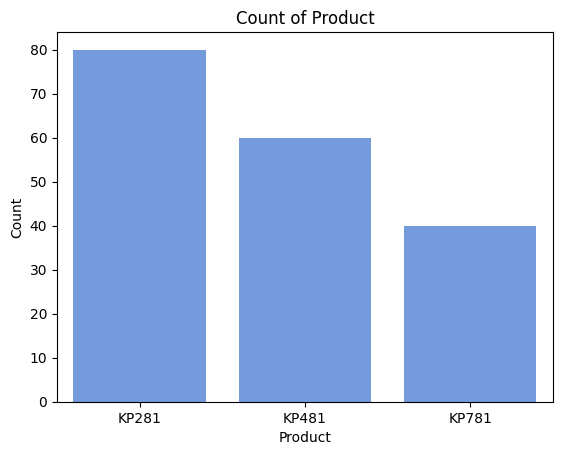

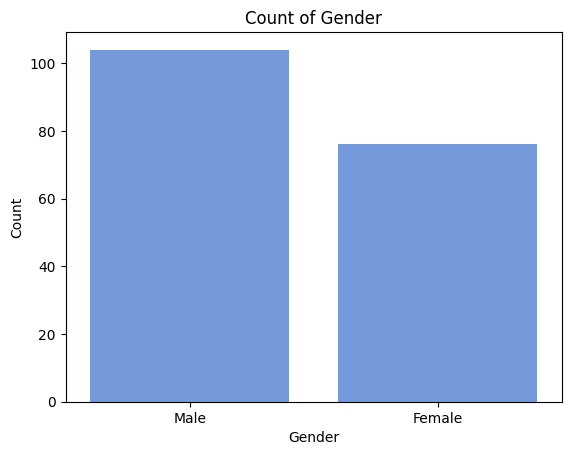

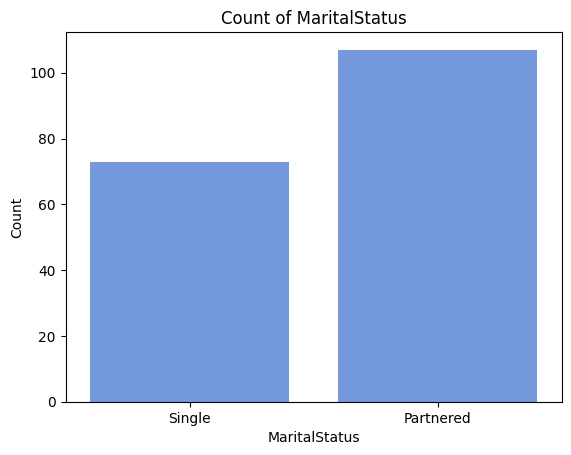

In [113]:
# Plot of object dtypes
col = ['Product','Gender','MaritalStatus']
fig, ax = plt.subplots()
for i in range(len(col)):
  sns.countplot(x=df[col[i]], color='cornflowerblue')
  plt.title(f'Count of {col[i]}')
  plt.ylabel('Count')
  plt.xlabel(col[i])
  plt.show()



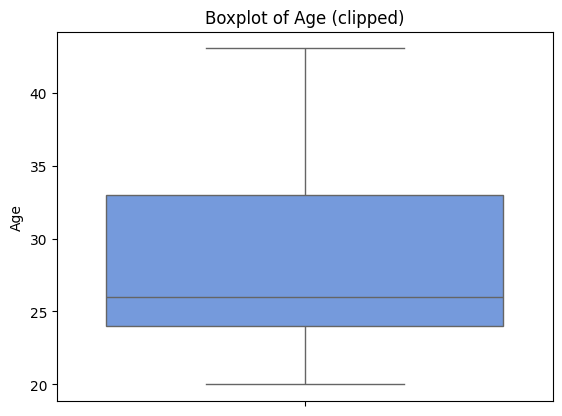

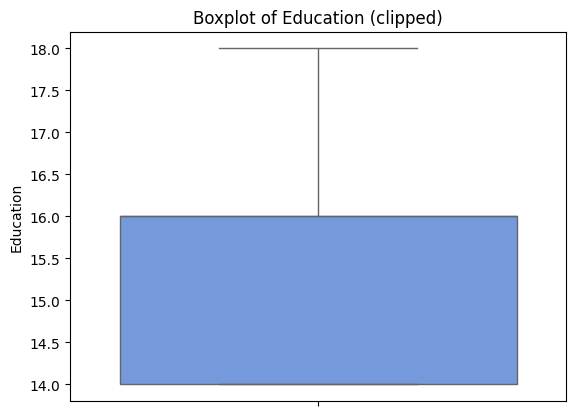

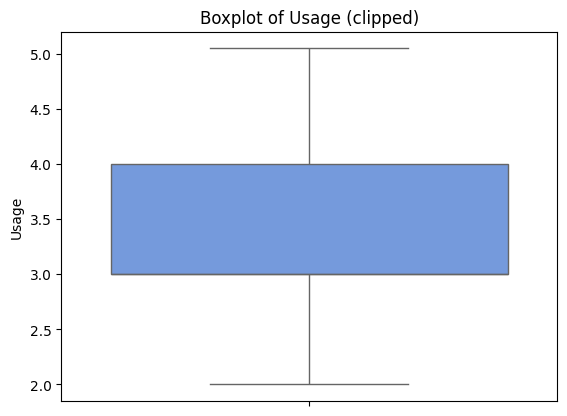

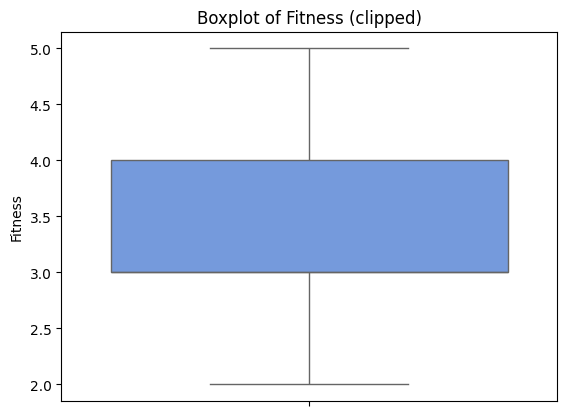

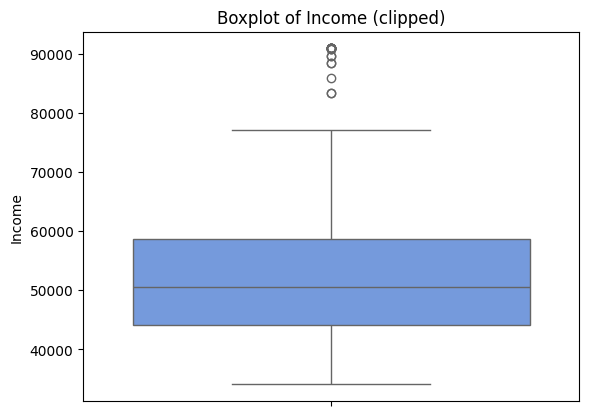

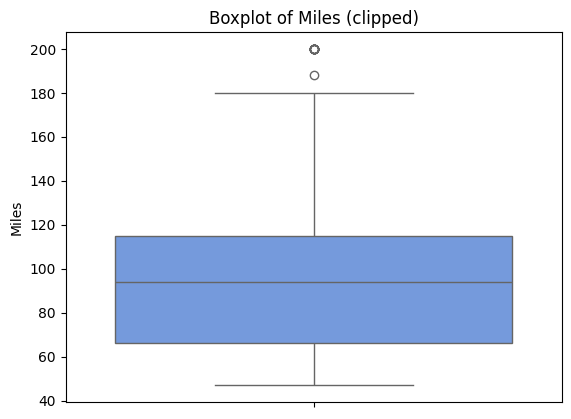

In [114]:
# Remove outliers
# clip the data between the 5 percentile and 95 percentile for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
  lower_bound = df[col].quantile(0.05)
  upper_bound = df[col].quantile(0.95)
  df_clipped[col] = np.clip(df[col], lower_bound, upper_bound)
  sns.boxplot(y=df_clipped[col], color='cornflowerblue')
  plt.title(f'Boxplot of {col} (clipped)')
  plt.show()

In [115]:
df_clipped = pd.DataFrame(df_clipped)
df_clipped.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Education_Group,Income_Group,Age_Group,Miles_Group
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000,180,180,180,180.0
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN,3,4,4,6.0
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN,Bachelor,Low,Young,150.0
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN,90,45,54,35.0
mean,NaN,28.641389,NaN,15.572222,NaN,3.396944,3.322222,53477.070000,101.088889,NaN,NaN,NaN,NaN
std,NaN,6.446373,NaN,1.362017,NaN,0.952682,0.937461,15463.662523,43.364286,NaN,NaN,NaN,NaN
min,NaN,20.000000,NaN,14.000000,NaN,2.000000,2.000000,34053.150000,47.000000,NaN,NaN,NaN,NaN
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000,NaN,NaN,NaN,NaN
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000,NaN,NaN,NaN,NaN
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000,NaN,NaN,NaN,NaN


---

##  **2. Outlier Detection & Handling**

### a) Outliers Observed (via Boxplots)
- **Income**: Right-skewed, with high-income outliers (e.g., ~$104k)
- **Miles**: Strong right tail (max = 360 miles/week vs median = 94)
- **Age**: Mild outliers above 45
- **Education**: Max = 21 years (likely PhD/post-grad), slight outlier
- **Usage & Fitness**: Minimal outliers

### b) Clipping (5th–95th Percentile)
We **clip numerical columns** to reduce extreme skew:
```python
df_clipped = df.copy()
numeric_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
for col in numeric_cols:
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)
    df_clipped[col] = np.clip(df[col], lower, upper)
```
→ This preserves 90% of central data while minimizing distortion from outliers.

---


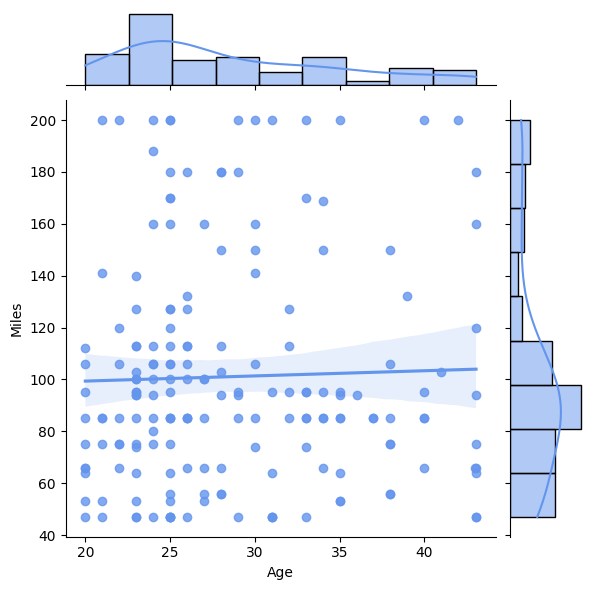

In [116]:
# Jointplot between Age and Miles
sns.jointplot(x='Age', y='Miles', data=df_clipped, kind='reg', color='cornflowerblue')
plt.show()
#

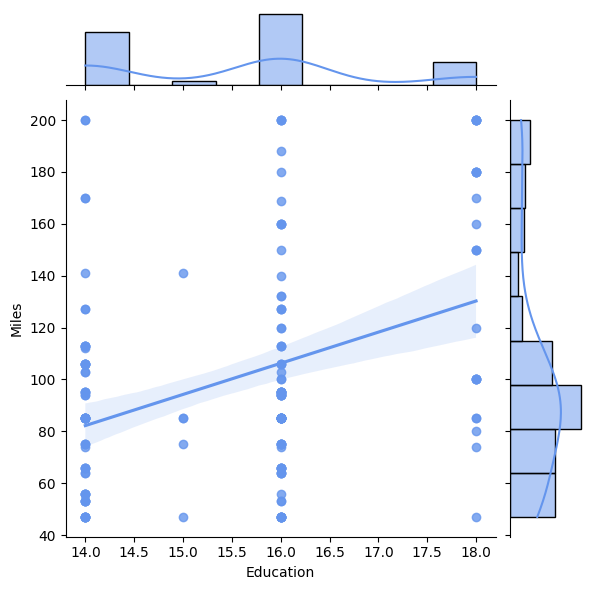

In [117]:
# Jointplot between Income and Miles
sns.jointplot(x='Education', y='Miles', data=df_clipped, kind='reg', color='cornflowerblue')
#

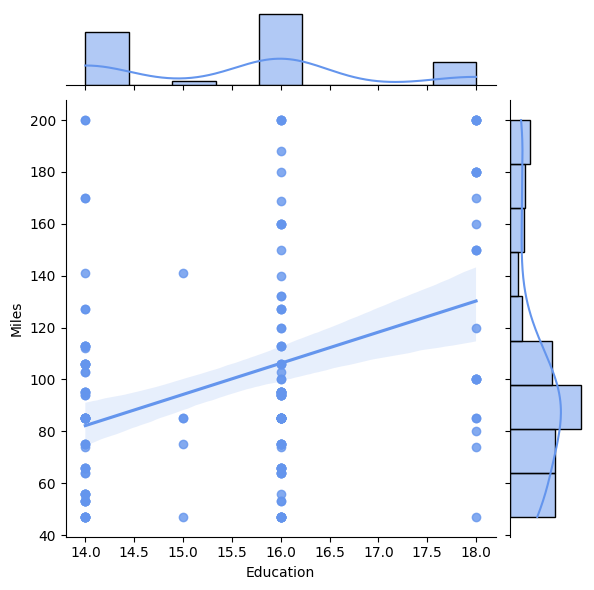

In [131]:
# Jointplot between Education and Miles
sns.jointplot(x='Education', y='Miles', data=df_clipped, kind='reg', color='cornflowerblue')

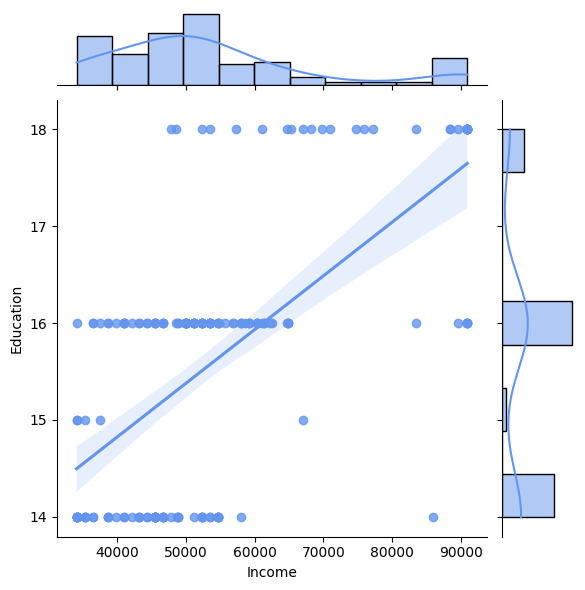

In [118]:
# Jointplot between Income and Education
sns.jointplot(x='Income', y='Education', data=df_clipped, kind='reg', color='cornflowerblue')

<Axes: xlabel='Gender', ylabel='Product'>

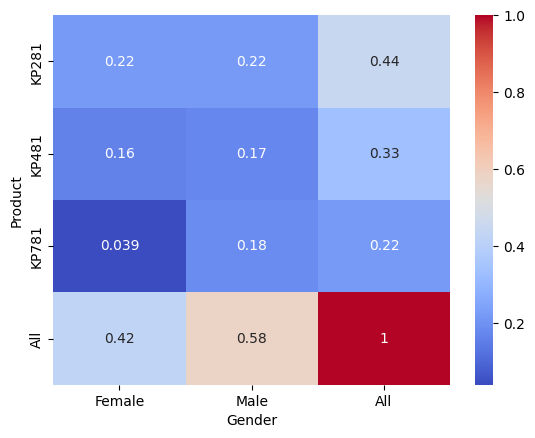

In [119]:
# Marginal probability by gender (what percent of customers have purchased KP281, KP481, or KP781)
sns.heatmap(pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ), annot=True, cmap = 'coolwarm')


<Axes: xlabel='MaritalStatus', ylabel='Product'>

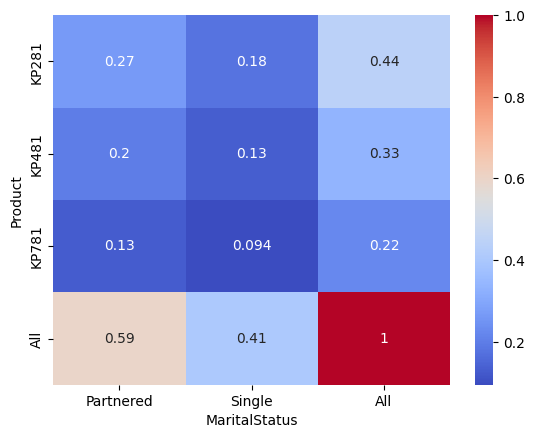

In [120]:
# Marginal probability by Marital Status
sns.heatmap(pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ), annot=True, cmap = 'coolwarm')

---

##   **3. Relationship Between Features & Product Purchased**

### a) Categorical vs Product (Count Plots)
- **Gender**:  
  - **Males** dominate purchases across all models  
  - KP781: ~95% male  
- **MaritalStatus**:  
  - **Partnered** customers prefer **KP281 & KP481**  
  - **Single** customers are **overrepresented in KP781** (65% of KP781 buyers are single)

### b) Continuous vs Product (Scatter/Box Plots)
- **Age**:  
  - KP281: Younger (18–30)  
  - KP481: Mid-age (25–35)  
  - KP781: Older (30–50)
- **Income**:  
  - KP281: <$50k  
  - KP481: $50k–$65k  
  - KP781: >$70k (median ~$80k)
- **Miles & Usage**:  
  - KP781 users run **>150 miles/week**, **5–7 times/week**  
  - KP281: ~80 miles/week, 2–3 times/week

✅ **Conclusion**: Product choice strongly correlates with **age, income, fitness level, and lifestyle intensity**.

---


<Axes: xlabel='Education_Group', ylabel='Product'>

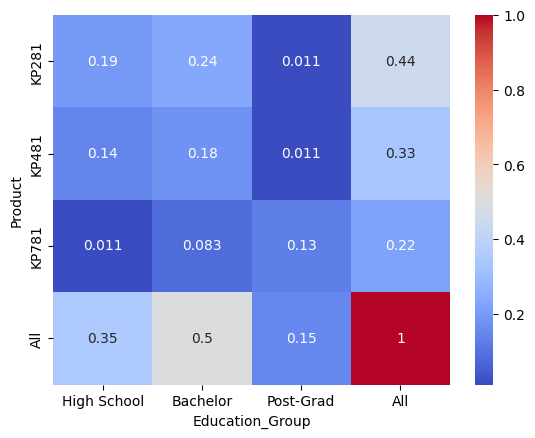

In [121]:
# # Marginal probability by Education Grouping
Education_buckets = ['High School', 'Bachelor', 'Post-Grad']
df['Education_Group'] = pd.qcut(df['Education'], q=4, labels=Education_buckets, duplicates='drop')
sns.heatmap(pd.crosstab(index =df['Product'],columns = df['Education_Group'],margins = True,normalize = True ), annot=True, cmap = 'coolwarm')

# sns.heatmap(pd.crosstab(index =df['Product'],columns = df['Education'],margins = True,normalize = True ), annot=True, cmap = 'coolwarm')

<Axes: xlabel='Income_Group', ylabel='Product'>

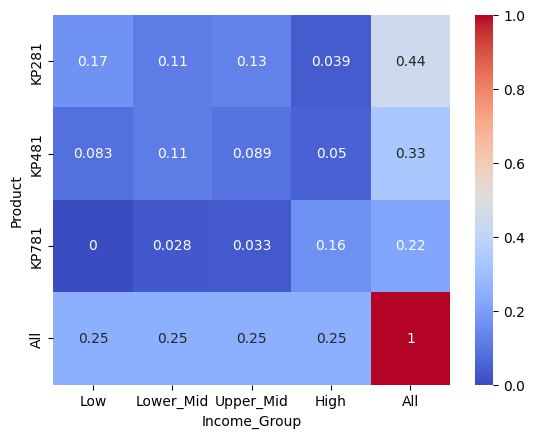

In [122]:
# # Marginal probability by Income Grouping
Income_buckets = ['Low', 'Lower_Mid', 'Upper_Mid',  'High']
df['Income_Group'] = pd.qcut(df['Income'], q=4, labels=Income_buckets, duplicates='drop')
sns.heatmap(pd.crosstab(index =df['Product'],columns = df['Income_Group'],margins = True,normalize = True ), annot=True, cmap = 'coolwarm')

<Axes: xlabel='Age_Group', ylabel='Product'>

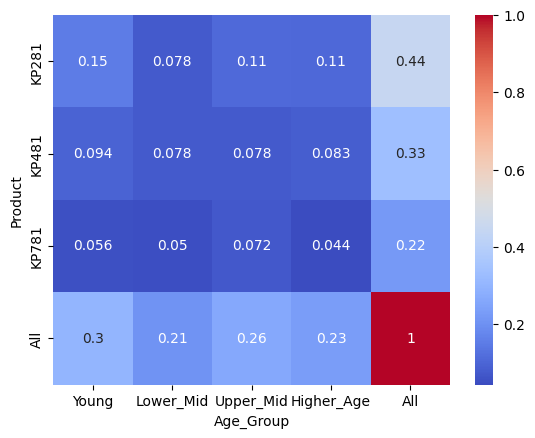

In [123]:
# Marginal probability by Age Grouping
Age_buckets = ['Young', 'Lower_Mid', 'Upper_Mid', 'Higher_Age']
df['Age_Group'] = pd.qcut(df['Age'], q=4, labels=Age_buckets, duplicates='drop')
sns.heatmap(pd.crosstab(index =df['Product'],columns = df['Age_Group'],margins = True,normalize = True ), annot=True, cmap= 'coolwarm')

<Axes: xlabel='Miles_Group', ylabel='Product'>

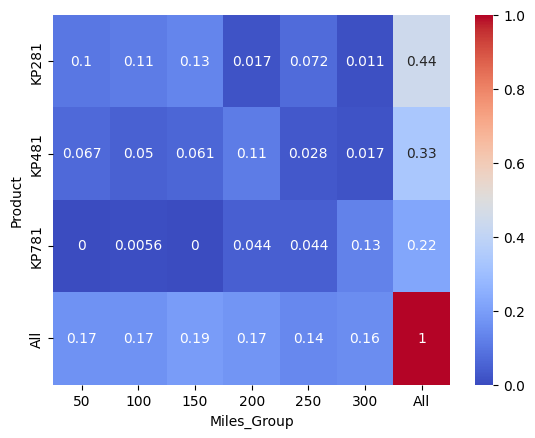

In [124]:
# Marginal probability by Miles Grouping
Miles_buckets = [50,100,150,200,250,300]
df['Miles_Group'] = pd.qcut(df['Miles'], q=6, labels=Miles_buckets, duplicates='drop')
sns.heatmap(pd.crosstab(index =df['Product'],columns = df['Miles_Group'],margins = True,normalize = True ), annot=True, cmap = 'coolwarm')

<Axes: xlabel='Fitness', ylabel='Product'>

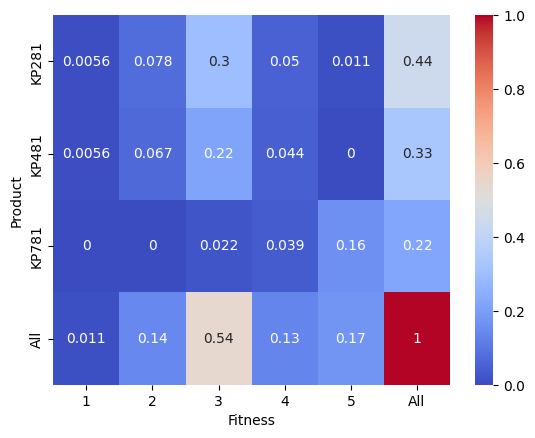

In [125]:
# Marginal probability by Fitness
sns.heatmap(pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ), annot=True, cmap = 'coolwarm')
#

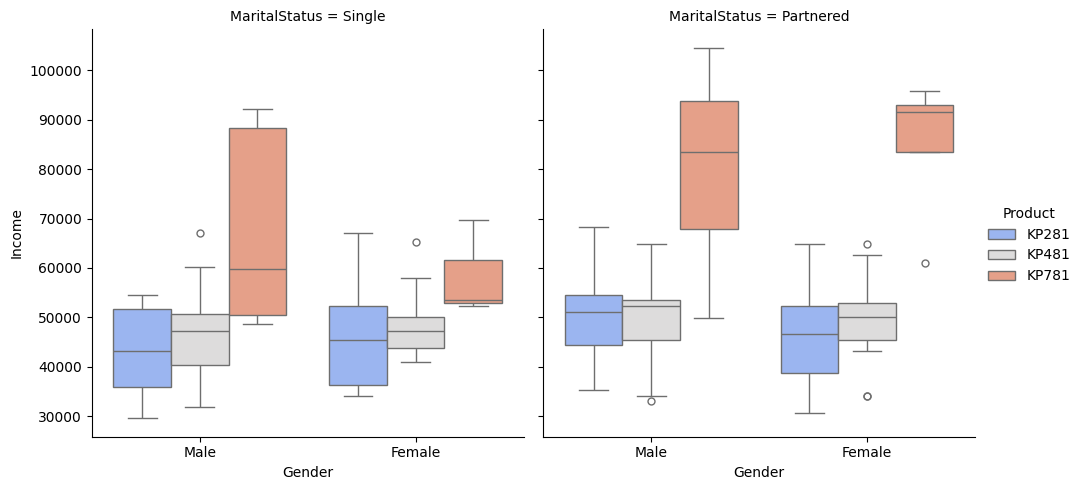

In [126]:
# Income by gender by product and by marital status
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=df, kind='box', palette='coolwarm')
plt.show()


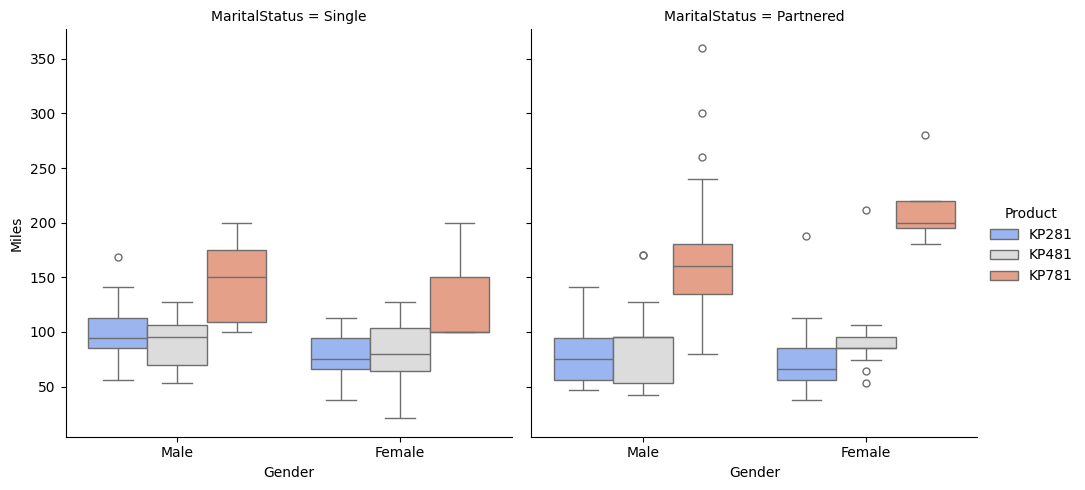

In [127]:
# Miles by gender by product and by marital status
sns.catplot(x='Gender',y='Miles', hue='Product', col='MaritalStatus', data=df, kind='box', palette='coolwarm')

---

##   **4. Probability Analysis**

### a) Marginal Probability (Overall Product Mix)
| Product | Count | Probability |
|--------|-------|-------------|
| KP281  | 80    | **44.4%** |
| KP481  | 60    | **33.3%** |
| KP781  | 40    | **22.2%** |

### b) Conditional Probabilities (Examples)

#### i) **P(KP781 | Male)**  
- Males = 104  
- Males who bought KP781 = 33  
→ **P = 33/104 ≈ 31.7%**

#### ii) **P(KP781 | Single)**  
- Singles = 73  
- Singles who bought KP781 = 26  
→ **P = 26/73 ≈ 35.6%**

#### iii) **P(KP281 | Income < $50k)**  
- ~60 customers earn <$50k  
- ~50 of them bought KP281  
→ **P ≈ 83%**

 **Insight**: High-income, single, male, fitness-conscious users are **high-probability leads for KP781**.

---


In [128]:
# Check the correlation among different factors
df.select_dtypes(include=np.number).corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


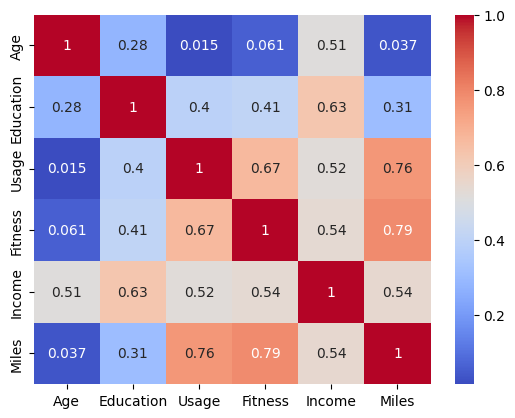

In [129]:
# Heatmap
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap = 'coolwarm')
plt.show()

---

##  **5. Correlation Analysis (Heatmap)**

Top Correlations:
- **Miles ↔ Fitness**: **0.79** (strong)  
- **Miles ↔ Usage**: **0.76**  
- **Income ↔ Education**: **0.63**  
- **Income ↔ Fitness**: **0.54**  
- **Age ↔ Income**: **0.51**

 **No multicollinearity issues**; all relationships are intuitive.

---


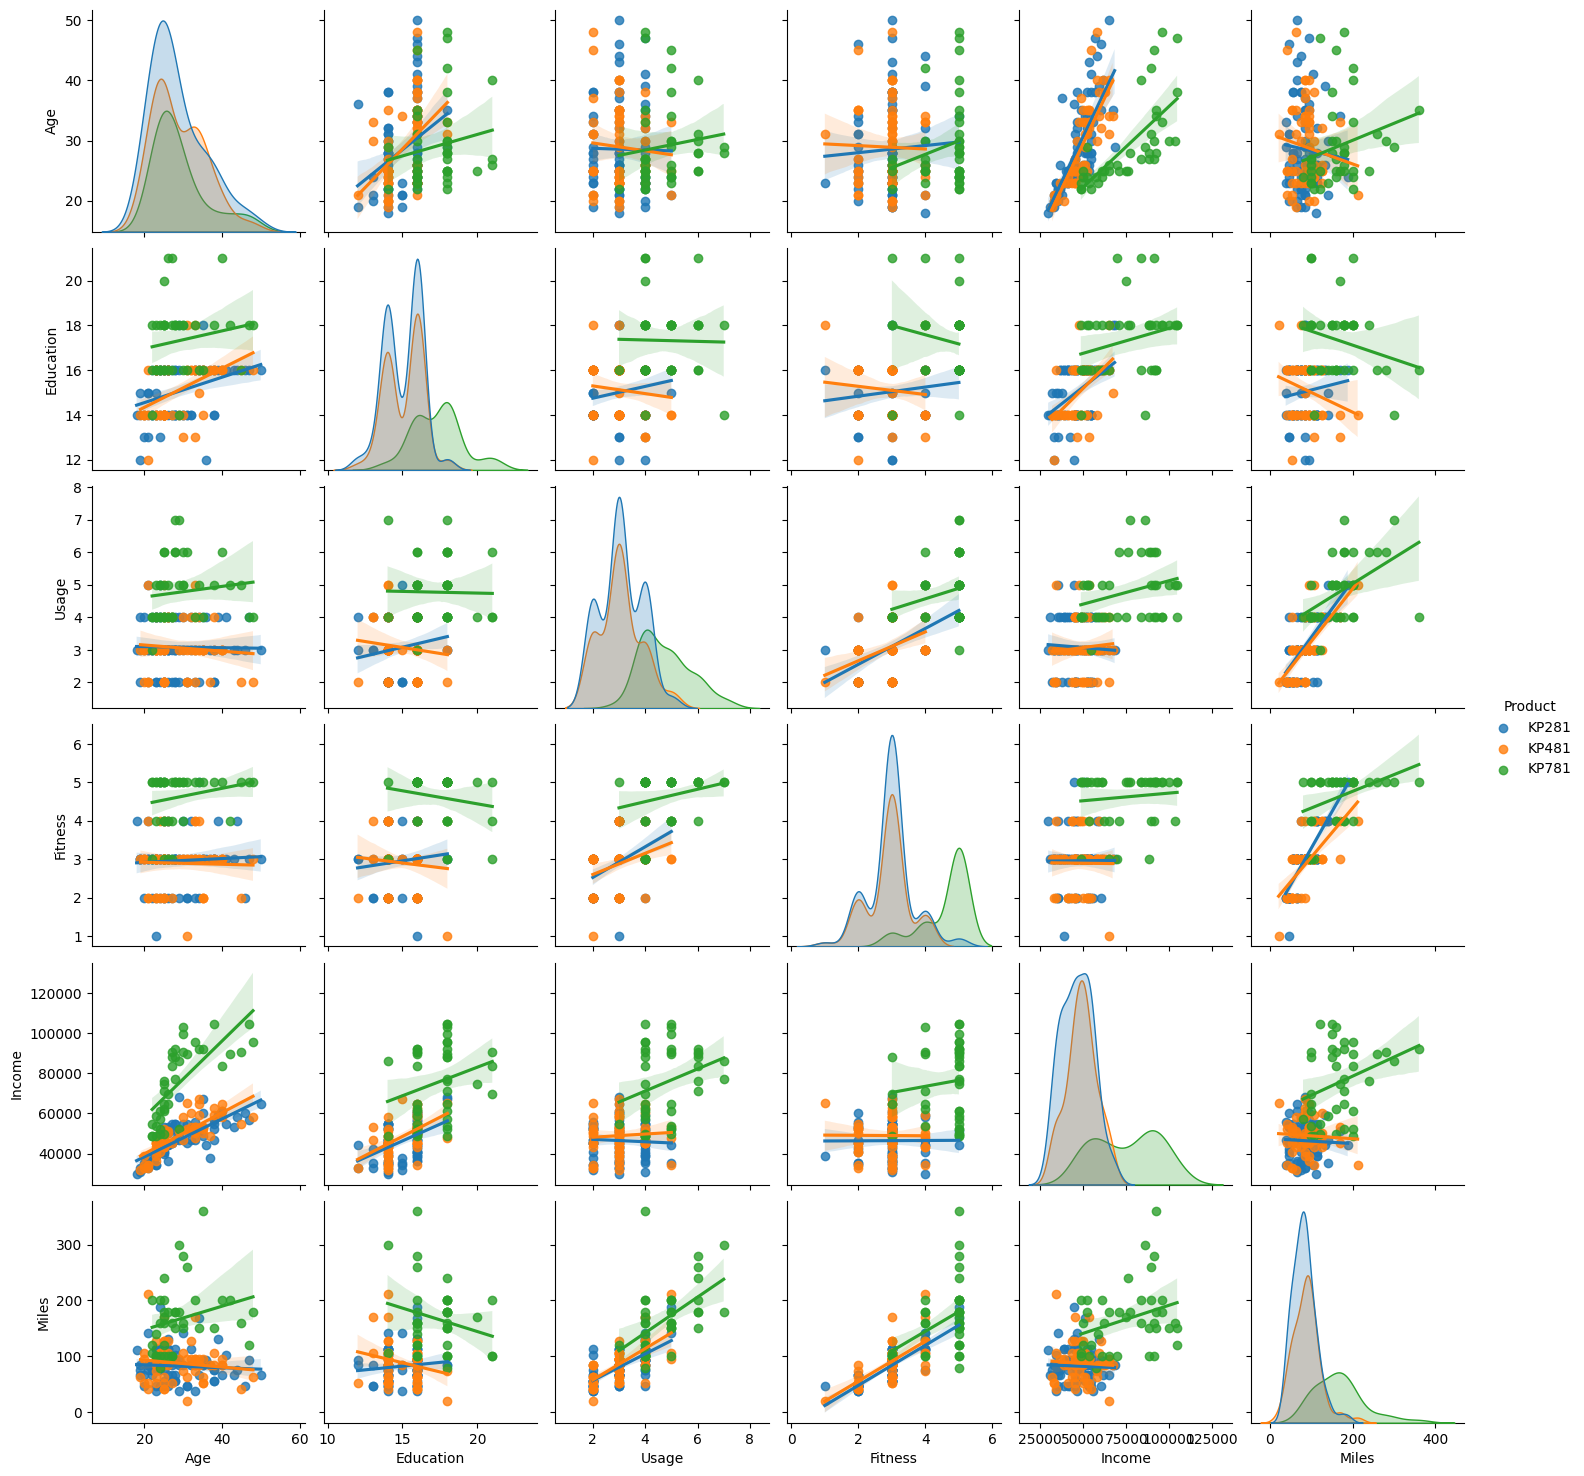

In [130]:
# Customer profiling and recommendation
# pairplot with hue as 'Product'
sns.pairplot(df, hue='Product', kind= 'reg')
plt.show()

---

##  **6. Customer Profiling & Recommendations**

🔹 KP281 (Entry-Level – $1,500)

    Age: Primarily 18–30 years (mean ~26)  
    Gender: Balanced, but slightly more Female (48%) vs. general trend  
    Income: Low to moderate → $29K–$50K (median: ~$45K)  
    Marital Status: Mostly partnered (60%+)  
    Fitness Level: 2–3 (beginner to average)  
    Usage: 2–3 times/week, 60–90 miles/week  
    Education: Typically 14–16 years (undergrad)
     

    ✅ Profile: Young adults or couples starting their fitness journey; budget-conscious; seek reliability over advanced features.
     


🔹 KP481 (Mid-Tier – $1,750)

    Age: 25–38 years (mean ~30)  
    Gender: Male-dominated (~65%)  
    Income: $50K–$65K (median: ~$58K)  
    Marital Status: Balanced (slightly more partnered)  
    Fitness Level: 3–4 (moderately fit)  
    Usage: 3–5 times/week, 90–130 miles/week  
    Education: 16+ years (bachelor’s or higher)
     

    ✅ Profile: Active professionals aiming to maintain or improve fitness; value performance and durability; willing to pay a premium for better features (e.g., heart rate monitoring, sturdier frame).
     


🔹 KP781 (Premium – $2,500)

    Age: 30–50 years (mean ~38)  
    Gender: Overwhelmingly male (95% of buyers)  
    Income: High earners → $70K–$105K (median: ~$80K)  
    Marital Status: 65% single (unlike other segments)  
    Fitness Level: 4–5 (very fit or athlete-level)  
    Usage: 5–7 times/week, 150–200+ miles/week  
    Education: Often 18+ years (post-grad/PhD)
     

    ✅ Profile: High-income, single, serious runners or fitness enthusiasts; prioritize performance, data tracking, and durability; treat treadmill as a long-term athletic investment.
     


---

 ## **7. Actionable Recommendations for Aerofit**

1.  **Refine Marketing Messaging**:
    *   **For KP281**: Focus on **affordability, space-saving design, and family health**. Target ads to younger, partnered couples and those in the early stages of their fitness journey. Use messaging like "Start your healthy lifestyle today."
    *   **For KP481**: Emphasize **durability, performance metrics, and training programs**. Market to serious runners and fitness enthusiasts who log high mileage. Highlight its "best value for performance" proposition.
    *   **For KP781**: Sell the **premium experience, advanced technology (e.g., heart rate control, cushioning), and long-term health investment**. Target high-income, partnered individuals. Position it as a luxury item for the home.

2.  **Optimize Sales Team Training**:
    *   Equip the sales team with these profiles. If a customer mentions a high weekly mileage goal, immediately steer them towards the **KP481**.
    *   If a customer is in a higher income bracket and mentions their spouse, highlight the **KP781**'s premium features.
    *   For first-time buyers or those on a budget, the **KP281** should be the default recommendation.

3.  **Bundle Products and Services**:
    *   **For KP281**: Offer bundled deals with basic fitness accessories (mats, water bottles).
    *   **For KP481**: Bundle with a subscription to a premium fitness app or a heart rate monitor.
    *   **For KP781**: Offer a premium service package (extended warranty, in-home setup, annual maintenance check).

4.  **Targeted Digital Advertising**:
    *   Use online ad platforms to target specific demographics:
        *   **KP281**: Target demographics of partnered individuals aged 25-35 with a median income.
        *   **KP781**: Use income-based targeting to reach high-income households and retarget website visitors who looked at premium models.

5. **Product Positioning**  
   - Market **KP281** as an **affordable starter treadmill** for young couples or students (partnered, lower income).  
   - Position **KP481** as a **balanced choice** for active professionals building fitness routines.  
   - Promote **KP781** as a **high-performance machine** for serious (mostly single) male runners with high disposable income.

6. **Targeted Marketing**  
   - Use **income & marital status** in digital ads:  
     - FB/Instagram ads for KP781 → target **single males, 30–50, income >$70k**  
     - Email campaigns for KP281 → **young partnered couples, income <$50k**

7. **In-Store Staff Training**  
   - Train sales staff to **ask 3 key questions**:  
     _“What’s your weekly mileage goal?”_  
     _“How often do you plan to use it?”_  
     _“What’s your fitness level?”_  
   → Use answers to **guide product recommendation**.

8. **Bundle Offers**  
   - Bundle **KP781 with premium accessories** (heart rate monitors, coaching apps)  
   - Offer **financing for KP781** (high-ticket item)

9. **Expand KP781 Appeal**  
   - Currently **<5% female buyers** for KP781 → opportunity to **create female-focused marketing** (e.g., “Elite Performance for Every Runner”)

---





---

### ✅ Final Note:
This analysis shows **clear segmentation** across products. Aerofit can **increase conversion and reduce returns** by aligning product recommendations with **customer profiles**, not just price.

---